<a href="https://colab.research.google.com/github/brianton90/LinearRegression/blob/main/Tarefa1_MatheusAntonacci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução


Para este trabalho foi fornecido pelo professor um conjunto de dados com 8 preditores de uma variável y obtidos por simulação e portanto eles tem uma relação. O objetivo deste trabalho é descobrir qual é a essa relação. Serão avaliadas as seguintes situações:





1.   Todas as variáveis predizem Y?
2.   Há colinearidade entre as variáveis?
3.   Há interação entre variáveis?
4.   Todas as variáveis possuem linearidade polinomial?


# Metodologia

Para descobrir se todas as variáveis dadas no problemas predizem Y vamos calcularemos a correlação entre as variáveis (x0) e a resposta Y. 







In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('dados3(1).csv')
data

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0,0.544883,0.437587,0.645894,0.563544,0.548814,0.423655,0.602763,0.715189,2.318601
1,1,0.791725,0.925597,0.568045,0.802868,0.891773,0.528895,0.383442,0.963663,2.294089
2,2,0.832620,0.978618,0.870012,0.836646,0.071036,0.778157,0.020218,0.087129,0.255917
3,3,0.118274,0.944669,0.143353,0.122540,0.799159,0.639921,0.780529,0.461479,2.445777
4,4,0.774234,0.018790,0.568434,0.785304,0.521848,0.456150,0.264556,0.414662,1.313699
...,...,...,...,...,...,...,...,...,...,...
95,95,0.713767,0.431760,0.399161,0.760395,0.399812,0.639187,0.344718,0.671383,1.763385
96,96,0.653421,0.110477,0.536923,0.673011,0.614528,0.726342,0.822407,0.070042,1.344047
97,97,0.029950,0.606308,0.109784,0.042059,0.405036,0.737254,0.321043,0.405374,2.055069
98,98,0.103298,0.534917,0.029190,0.115818,0.703217,0.867167,0.959142,0.634786,3.083833


In [5]:
# Tratamento dos dados
Y = data['y']
X = data.drop("Unnamed: 0",1);
# Normalizando a Matriz 
Xavg = np.mean(X,axis=0);
Xstd = X.std()
nPoints = X.shape[0]
B = X - np.tile(Xavg,(nPoints,1))
B_ = B / Xstd

<ipython-input-5-af157452fc52>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop("Unnamed: 0",1);


In [6]:
#Calculando as correlações
Cxy = B_.corr()
Cxy



,x1,x2,x3,x4,x5,x6,x7,x8,y
x1,1.000000,-0.249202,0.046072,0.998770,0.074743,-0.006162,-0.082103,0.070661,-0.472483
x2,-0.249202,1.000000,-0.028827,-0.251541,-0.001313,0.149947,-0.050749,0.127977,0.156587
x3,0.046072,-0.028827,1.000000,0.048058,-0.089061,0.248118,-0.097015,-0.234550,-0.245265
x4,0.998770,-0.251541,0.048058,1.000000,0.077023,-0.010988,-0.088011,0.077017,-0.471590
x5,0.074743,-0.001313,-0.089061,0.077023,1.000000,-0.074593,0.171763,0.004663,0.023495
x6,-0.006162,0.149947,0.248118,-0.010988,-0.074593,1.000000,0.145628,-0.014219,0.018787
x7,-0.082103,-0.050749,-0.097015,-0.088011,0.171763,0.145628,1.000000,0.040588,0.607263
x8,0.070661,0.127977,-0.234550,0.077017,0.004663,-0.014219,0.040588,1.000000,0.564683
y,-0.472483,0.156587,-0.245265,-0.471590,0.023495,0.018787,0.607263,0.564683,1.000000


O código acima nos mostra a matriz de correlação dos dados do problema. Abaixo temos um heatmap da correlação. A relação da resposta (y) com as variaveis (xn) é dada pela ultima coluna.

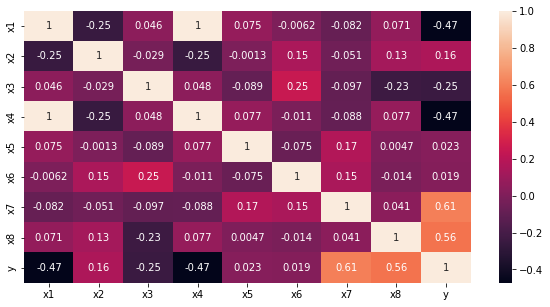

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(Cxy, annot=True);

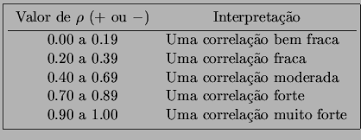

Consideramos aqui apenas as variáveis com correção moderada com o problema, então eliminamos x2, x3, x5, x6. Restando x1 e x4 com correlação negativa moderada e x7 e x8 com correlação forte. Agora seguimos para a análise de componentes principais (PCA)



In [8]:
X = B.drop(columns=['x2','x3','x5','x6']);
C = X.cov()
C


,x1,x4,x7,x8,y
x1,0.091878,0.091586,-0.007413,0.005979,-0.105233
x4,0.091586,0.091521,-0.007931,0.006504,-0.104830
x7,-0.007413,-0.007931,0.088726,0.003375,0.132911
x8,0.005979,0.006504,0.003375,0.077918,0.115820
y,-0.105233,-0.104830,0.132911,0.115820,0.539908


Obtendo a Matriz de covariancia acima o proximo passo é calcular os autovalores e autovetores da matriz de covariancia.

In [9]:
#Determinando autovalores e autovetores
autovalores, autovetores = np.linalg.eig(C)
#Imprimindo autovalores de C
print("Autovalores:{}".format(autovalores))
#Imprimindo autovetores de C
print("Autovetores:{}".format(autovetores))

Autovalores:[6.44157094e-01 1.56447021e-01 7.88482047e-02 1.09055844e-04
 1.03900934e-02]
Autovetores:[[-0.20907349 -0.63356901  0.06505222  0.7066303   0.22654009]
 [-0.20841958 -0.63308029  0.05532427 -0.70754857  0.22822112]
 [ 0.22473669 -0.20433672  0.76657368 -0.00591236 -0.56574708]
 [ 0.18295889 -0.35745154 -0.63554919  0.00354909 -0.65940812]
 [ 0.91042244 -0.16815043 -0.03390349  0.00104355  0.37643842]]


Ordenamos os autovalores do maior para o menor

In [10]:
pares_autos = [(
    np.abs(autovalores[i]),
    autovetores[:,i]
    ) for i in range(len(autovalores))
]
pares_autos.sort()
pares_autos.reverse()
pares_autos
     

[(0.6441570935141738,
  array([-0.20907349, -0.20841958,  0.22473669,  0.18295889,  0.91042244])),
 (0.15644702139351055,
  array([-0.63356901, -0.63308029, -0.20433672, -0.35745154, -0.16815043])),
 (0.07884820467840495,
  array([ 0.06505222,  0.05532427,  0.76657368, -0.63554919, -0.03390349])),
 (0.0103900934147984,
  array([ 0.22654009,  0.22822112, -0.56574708, -0.65940812,  0.37643842])),
 (0.0001090558443314626,
  array([ 0.7066303 , -0.70754857, -0.00591236,  0.00354909,  0.00104355]))]

Agora calculamos a variança acumulada de cada autovalor

In [11]:
sum = sum(autovalores)
var = [(i / sum)*100 for i in sorted(autovalores, reverse=True)]
cum_var = np.cumsum(var)
x = ['PCA %s' %i for i in range(1, len(autovalores) +1)]
data_pca = pd.DataFrame({
    'autovalores': autovalores,
    'acum_var': cum_var,
    'var': var,
    'Componente_P':x
})
data_pca
     

,autovalores,acum_var,var,Componente_P
0,0.644157,72.381148,72.381148,PCA 1
1,0.156447,89.960424,17.579276,PCA 2
2,0.078848,98.820256,8.859832,PCA 3
3,0.000109,99.987746,1.167490,PCA 4
4,0.010390,100.000000,0.012254,PCA 5


Consideramos para esse problema uma variancia acumulada de **98.82**, então selecionamos os 3 primeiros autovalores. Então multiplicamos a matriz original X pela matriz de autovetores truncada até a componente principal 3.

In [53]:
n_comp = data_pca.shape[0]
autovetores = [p[1] for p in pares_autos]
A = autovetores[0:3]
X_ = np.dot(X,np.array(A).T)
data_new = pd.DataFrame(X_,columns = x[0:3])
data_new


,PCA 1,PCA 2,PCA 3
0,0.356707,-0.244993,-0.095606
1,0.229074,-0.592775,-0.391520
2,-1.884113,0.090188,-0.039247
3,0.647130,0.337465,0.145448
4,-0.783340,-0.185187,-0.102609
...,...,...,...
95,-0.291118,-0.314868,-0.224875
96,-0.644730,-0.033461,0.528947
97,0.213132,0.624018,-0.168076
98,1.304411,0.145473,0.149244


Abaixo temos a matriz com os componentes principais:

In [55]:
D = data_new.join(X['y'])
D

,PCA 1,PCA 2,PCA 3,y
0,0.356707,-0.244993,-0.095606,0.359510
1,0.229074,-0.592775,-0.391520,0.334997
2,-1.884113,0.090188,-0.039247,-1.703174
3,0.647130,0.337465,0.145448,0.486686
4,-0.783340,-0.185187,-0.102609,-0.645392
...,...,...,...,...
95,-0.291118,-0.314868,-0.224875,-0.195707
96,-0.644730,-0.033461,0.528947,-0.615045
97,0.213132,0.624018,-0.168076,0.095978
98,1.304411,0.145473,0.149244,1.124742


Agora iremos utilizar este dataframe para a predição via regressão linear.

No código abaixo, foi separado 15% dos dados para testar o modelo obtido. Também, é mostrado o gráfico com os pontos utilizados para treinamento do modelo e o modelo obtido.

In [90]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data_new, D['y'], test_size=0.15, random_state=0)
print('Xtrain:' ,Xtrain.shape)
print('Xtest:', Xtest.shape)
print('ytrain: ', ytrain.shape)
print('ytest: ', ytest.shape)
model = LinearRegression();
model.fit(Xtrain, ytrain)
y_predicted = model.predict(Xtest)
rmse = mean_squared_error(ytest, y_predicted)
r2 = r2_score(ytest, y_predicted)
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Xtrain: (85, 3)
Xtest: (15, 3)
ytrain:  (85,)
ytest:  (15,)
Slope: [ 0.91306398 -0.16912145 -0.03834853]
Intercept: -0.0008561491101568772
Root mean squared error:  0.0012037286504551416
R2 score:  0.9976373669566345


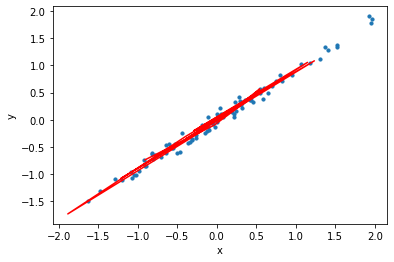

In [97]:
plt.scatter(Xtrain.iloc[:, 0], ytrain, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(Xtest.iloc[:,0], y_predicted, color='r')
plt.show()


# Conclusão

Neste trabalho foi construido um modelo por regressão linear multipla onde os preditores utilizdos foram obtidos, primeiramente, verificando a correlação dessas features com a variável resposta. Dessa forma, eliminou-se features que não obtinham relação robusta com a resposta. Após, foi realizada uma análise de componentes principais onde foi selecionado preditores que concentravam 98.82% da variancia do problema. Dessa forma, chegamos ao modelo representado acima, com r2=0.99763, próximo a 1, o que nos mostra que o modelo se ajusta muito bem aos dados utilizados. 